In [21]:
import numpy as np
from qutip import * 
import scipy.optimize
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from random import *

In [2]:
Pauli=[qeye(2),sigmax(),sigmay(),sigmaz()]

def PTM(gate):

    PTM=[]
    for o in Pauli:
        temp=[]
        for i in Pauli:
            temp.append(np.trace(o*gate(i))/2)
        PTM.append(temp)

    df=pd.DataFrame(np.real(PTM), columns=['I','X','Y','Z'], index=['I','X','Y','Z'])
    
    return df

# Quantum teleportation

In [3]:
# Bell measurement

psi00=tensor(basis(2,0),basis(2,0))
psi01=tensor(basis(2,0),basis(2,1))
psi10=tensor(basis(2,1),basis(2,0))
psi11=tensor(basis(2,1),basis(2,1))

bell0 = (psi00 + psi11)/np.sqrt(2)
bell1 = (psi00 - psi11)/np.sqrt(2)
bell2 = (psi01 + psi10)/np.sqrt(2)
bell3 = (psi01 - psi10)/np.sqrt(2)

PBS00 = psi00*psi00.dag()
PBS01 = psi01*psi01.dag()
PBS10 = psi10*psi10.dag()
PBS11 = psi11*psi11.dag()

single_gates1= tensor(qeye(2),qeye(2))
single_gates2= tensor(rx(np.pi/2),rx(np.pi/2))

Ent_filter = psi00*psi00.dag()+psi11*psi11.dag()

Fusion=single_gates2*Ent_filter*single_gates1

<ipython-input-3-0f23f6e15190>:19: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  single_gates2= tensor(rx(np.pi/2),rx(np.pi/2))


<AxesSubplot:>

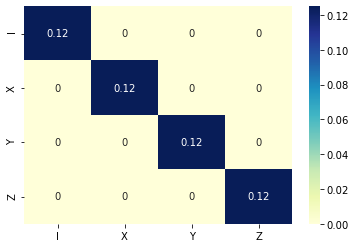

In [4]:
# Quantum teleportation

Bell_M00 = PBS00*Fusion
Bell_M01 = PBS01*Fusion
Bell_M10 = PBS10*Fusion
Bell_M11 = PBS11*Fusion


Bell_M = Bell_M01

def Qteleportation(ini_state):
    state_prep = tensor(ini_state, bell0*bell0.dag())
    bell_meas = tensor(Bell_M,qeye(2))
    tele_state=ptrace(bell_meas*state_prep*bell_meas.dag(),[2])
    
    return tele_state

df=PTM(Qteleportation)
sns.heatmap(df, annot=True, cmap='YlGnBu')


# Pauli twirling

In [5]:
# Find Pauli twirling for Quantum teleportation

Pauli_twirling=[]
for a1 in range(4):
    for a2 in range(4):
        for b1 in range(4):
            for b2 in range(4):
                target=Fusion
                test=tensor(Pauli[a1],Pauli[a2])*Fusion*tensor(Pauli[b1],Pauli[b2])
                Infidelity = 1-np.abs((np.trace(target.dag() * test)))/2
                
                if Infidelity==0:
                    Pauli_twirling.append([a1,a2,b1,b2])

In [6]:
class Qteleportation:
    def __init__(self):
        self.state = qzero(2)

    def teleportation(self,pre_error,post_error):
        
        state_prep = tensor(self.state, bell0*bell0.dag())
        
        Bell_M1=PBS01*post_error*Fusion*pre_error
        Bell_M2=PBS10*post_error*Fusion*pre_error

        bell_meas1 = tensor(Bell_M1,qeye(2))
        bell_meas2 = tensor(Bell_M2,qeye(2))

        self.state = (ptrace(bell_meas1*state_prep*bell_meas1.dag(),[2])
                      + ptrace(bell_meas2*state_prep*bell_meas2.dag(),[2]))/2

    def teleportation_RC(self,pre_error,post_error):
        
        state_prep = tensor(self.state, bell0*bell0.dag())
        temp = qzero(2)
        
        for k in range(len(Pauli_twirling)):
            [a1,a2,b1,b2]=Pauli_twirling[k]
        
            Bell_M1 = PBS01*tensor(Pauli[a1],Pauli[a2])*post_error*Fusion*pre_error*tensor(Pauli[b1],Pauli[b2])
            Bell_M2 = PBS10*tensor(Pauli[a1],Pauli[a2])*post_error*Fusion*pre_error*tensor(Pauli[b1],Pauli[b2])


            bell_meas1 = tensor(Bell_M1,qeye(2))
            bell_meas2 = tensor(Bell_M2,qeye(2))

            temp = temp + (ptrace(bell_meas1*state_prep*bell_meas1.dag(),[2])
                                       + ptrace(bell_meas2*state_prep*bell_meas2.dag(),[2]))/2
        self.state = temp/len(Pauli_twirling)
        
    def teleportation_RC_v2(self,pre_error,post_error,twirl_comb):
        
        state_prep = tensor(self.state, bell0*bell0.dag())

        [a1,a2,b1,b2]=Pauli_twirling[twirl_comb]

        Bell_M1 = PBS01*tensor(Pauli[a1],Pauli[a2])*post_error*Fusion*pre_error*tensor(Pauli[b1],Pauli[b2])
        Bell_M2 = PBS10*tensor(Pauli[a1],Pauli[a2])*post_error*Fusion*pre_error*tensor(Pauli[b1],Pauli[b2])


        bell_meas1 = tensor(Bell_M1,qeye(2))
        bell_meas2 = tensor(Bell_M2,qeye(2))

        self.state = (ptrace(bell_meas1*state_prep*bell_meas1.dag(),[2])
                                   + ptrace(bell_meas2*state_prep*bell_meas2.dag(),[2]))/2

## Repeater without RC

In [29]:
tele = Qteleportation()
up_to = 20

pre_error_list = [tensor(rx(np.random.normal(loc=0.0, scale=3*np.pi/180)),ry(np.random.normal(loc=0.0, scale=3*np.pi/180))) for k in range(up_to)]
post_error_list = [tensor(rx(np.random.normal(loc=0.0, scale=3*np.pi/180)),ry(np.random.normal(loc=0.0, scale=3*np.pi/180))) for k in range(up_to)]

<ipython-input-29-889c9afb78ed>:4: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  pre_error_list = [tensor(rx(np.random.normal(loc=0.0, scale=3*np.pi/180)),ry(np.random.normal(loc=0.0, scale=3*np.pi/180))) for k in range(up_to)]
<ipython-input-29-889c9afb78ed>:5: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  post_error_list = [tensor(rx(np.random.normal(loc=0.0, scale=3*np.pi/180)),ry(np.random.normal(loc=0.0, scale=3*np.pi/180))) for k in range(up_to)]


In [33]:
fid_list=[]

for num in range(up_to):
    PTM=[]
    for o in Pauli:
        temp=[]
        for i in Pauli:    
            tele.state = i
            for k in range(num):
                pre_error=pre_error_list[0]
                post_error=post_error_list[0]
                tele.teleportation(pre_error,post_error)
                tele.state=tele.state*8
            temp.append(np.trace(o*tele.state)/2)

        PTM.append(temp)

    df=pd.DataFrame(np.real(PTM), columns=['I','X','Y','Z'], index=['I','X','Y','Z'])
    fid_list.append(np.trace(df/df['I']['I'])/4)

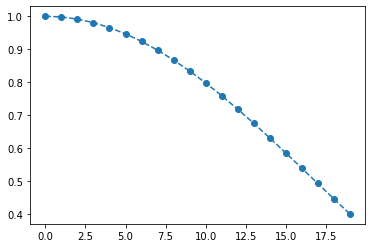

In [34]:
plt.plot(range(up_to),fid_list,'--o')


In [35]:
df

,I,X,Y,Z
I,1.0,0.000000,0.000000,0.000000
X,0.0,0.011077,0.933299,-0.357981
Y,0.0,-0.832485,-0.189553,-0.520033
Z,0.0,-0.553367,0.303944,0.775435


## Repeater with RC

In [10]:
tele = Qteleportation()

fid_list=[]
up_to = 20

for num in range(up_to):
    PTM=[]
    for o in Pauli:
        temp=[]
        for i in Pauli:    
            tele.state = i
            for k in range(num):
                pre_error=pre_error_list[k]
                post_error=post_error_list[k]
                tele.teleportation_RC(pre_error,post_error)
                tele.state=tele.state*8

            temp.append(np.trace(o*tele.state)/2)

        PTM.append(temp)

    df=pd.DataFrame(np.real(PTM), columns=['I','X','Y','Z'], index=['I','X','Y','Z'])
    fid_list.append(np.trace(df/df['I']['I'])/4)

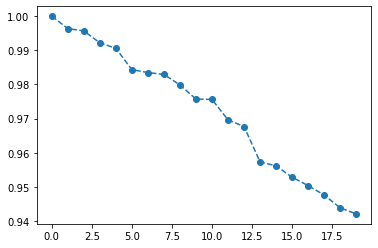

In [11]:
plt.plot(range(up_to),fid_list,'--o')

In [12]:
df

,I,X,Y,Z
I,1.0,0.000000,0.000000,0.000000
X,0.0,0.918563,0.000000,0.000000
Y,0.0,0.000000,0.900718,0.000000
Z,0.0,0.000000,0.000000,0.948893


In [13]:
tele = Qteleportation()

fid_list=[]
up_to = 20
num_rcircuits=15

twirling_combination=[]
arr=np.arange(len(Pauli_twirling))

for k in range(up_to):
    twirling_combination.append(np.random.choice(arr,num_rcircuits,replace=False))
twirling_combination=np.array(twirling_combination)


for num in range(up_to):
    PTM=[]
    for o in Pauli:
        
        temp_list=[]
        for num_c in range(num_rcircuits):
            temp=[]
            for i in Pauli:    
                tele.state = i
                for k in range(num):
                    pre_error=pre_error_list[k]
                    post_error=post_error_list[k]
                    tele.teleportation_RC_v2(pre_error,post_error,twirling_combination[k,num_c])
                    tele.state=tele.state*8

                temp.append(np.trace(o*tele.state)/2)
            temp_list.append(temp)
            
        PTM.append(np.mean(temp_list,axis=0))

    df=pd.DataFrame(np.real(PTM), columns=['I','X','Y','Z'], index=['I','X','Y','Z'])
    fid_list.append(np.trace(df/df['I']['I'])/4)

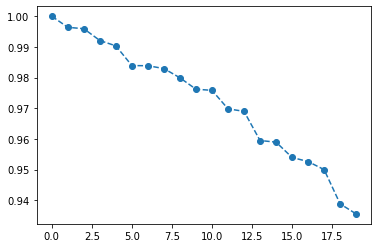

In [14]:
plt.plot(range(up_to),fid_list,'--o')

In [15]:
df

,I,X,Y,Z
I,1.0,0.000000,0.000000,0.000000
X,0.0,0.899158,0.002000,0.018580
Y,0.0,-0.005567,0.890186,-0.031791
Z,0.0,-0.020315,0.015714,0.952820


In [16]:
tele = Qteleportation()

fid_list=[]
up_to = 20
num_rcircuits=5

twirling_combination=[]
arr=np.arange(len(Pauli_twirling))

for k in range(up_to):
    twirling_combination.append(np.random.choice(arr,num_rcircuits,replace=True))
twirling_combination=np.array(twirling_combination)


for num in range(up_to):
    PTM=[]
    for o in Pauli:
        
        temp_list=[]
        for num_c in range(num_rcircuits):
            temp=[]
            for i in Pauli:    
                tele.state = i
                for k in range(num):
                    pre_error=pre_error_list[k]
                    post_error=post_error_list[k]
                    tele.teleportation_RC_v2(pre_error,post_error,twirling_combination[k,num_c])
                    tele.state=tele.state*8

                temp.append(np.trace(o*tele.state)/2)
            temp_list.append(temp)
            
        PTM.append(np.mean(temp_list,axis=0))

    df=pd.DataFrame(np.real(PTM), columns=['I','X','Y','Z'], index=['I','X','Y','Z'])
    fid_list.append(np.trace(df/df['I']['I'])/4)

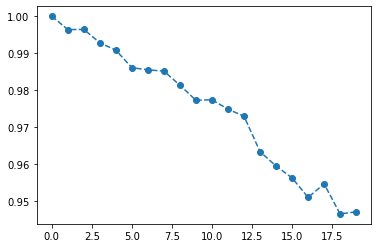

In [17]:
plt.plot(range(up_to),fid_list,'--o')

In [18]:
df

,I,X,Y,Z
I,1.0,0.000000,0.000000,0.000000
X,0.0,0.912370,0.124240,0.052408
Y,0.0,-0.107425,0.911927,0.030828
Z,0.0,-0.061098,-0.043702,0.964375
